In [4]:
dataset="dataset"

In [2]:
import os
import cv2
import keras
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from glob import glob
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from sklearn.utils import shuffle
from tensorflow.keras.metrics import Accuracy, Precision, Recall, AUC
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras import Input, Sequential, Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"
tf.get_logger().setLevel("ERROR")
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Multiply,
    Activation,
)
import tensorflow as tf


In [5]:
x_train = []
y_train = []
image_size = 224
labels =  [ 'ક','ખ', 'ગ','ઘ', 'ચ', 'છ', 'જ', 'ટ', 'ઠ', 'ડ', 'ઢ', 'ણ', 'ત', 'થ', 'દ', 'ધ', 'ન',
     'ફ', 'બ', 'ભ', 'મ', 'ય', 'ર', 'લ', 'વ','શ','ષ' , 'સ' ,'હ','ળ','ક્ષ', 'જ્ઞ','0']

for i in labels:
    folderPath = os.path.join(dataset,i)
    for j in os.listdir(folderPath):
        img = Image.open(os.path.join(folderPath,j))
        img = np.array(img)
        img = cv2.resize(img,(image_size,image_size))
        print(type(img))
        x_train.append(img)
        y_train.append(i)
    print(f"Loaded {i} images")    
for i in labels:
    folderPath = os.path.join(dataset,i)
    for j in os.listdir(folderPath):
        img = Image.open(os.path.join(folderPath,j))
        img = np.array(img)
        img = cv2.resize(img,(image_size,image_size))
        x_train.append(img)
        y_train.append(i)

x_train = np.array(x_train)
y_train = np.array(y_train)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

KeyboardInterrupt: 

In [6]:
print(len(labels))

33


In [7]:
x_train, y_train = shuffle(x_train, y_train, random_state=42)
x_train.shape

(6482, 224, 224, 3)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [10]:
print("train shape", X_train.shape, Y_train.shape)
print("test shape", X_test.shape, Y_test.shape)

train shape (5185, 224, 224, 3) (5185,)
test shape (1297, 224, 224, 3) (1297,)


In [11]:
print(Y_train[:5])
print(Y_test[:5])

['ત' 'ત' 'ધ' 'હ' 'ધ']
['હ' 'ય' 'છ' 'દ' 'લ']


In [12]:
Y_train

array(['ત', 'ત', 'ધ', ..., 'ફ', 'ઠ', 'થ'], dtype='<U3')

In [13]:
gujarati_ascii_dict = {char: i for i,  char in enumerate(labels)}
for char, ascii_value in gujarati_ascii_dict.items():
    print(f"{char}: {ascii_value}")

ક: 0
ખ: 1
ગ: 2
ઘ: 3
ચ: 4
છ: 5
જ: 6
ટ: 7
ઠ: 8
ડ: 9
ઢ: 10
ણ: 11
ત: 12
થ: 13
દ: 14
ધ: 15
ન: 16
ફ: 17
બ: 18
ભ: 19
મ: 20
ય: 21
ર: 22
લ: 23
વ: 24
શ: 25
ષ: 26
સ: 27
હ: 28
ળ: 29
ક્ષ: 30
જ્ઞ: 31
0: 32


In [15]:
Y_train_list = []
for i in Y_train:
        # If i is a lowercase letter, map it to a unique integer
        Y_train_list.append(gujarati_ascii_dict[i])

# Convert to categorical
y_train1 = tf.keras.utils.to_categorical(Y_train_list , num_classes=len(labels))


In [16]:
print("one hot encoding \n", y_train1[:5])

one hot encoding 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [19]:
Y_test_list = []
for i in Y_test:
    if i.isdigit():
        Y_test_list.append(int(i))
    else:
        # If i is a lowercase letter, map it to a unique integer
        Y_test_list.append(gujarati_ascii_dict[i])

# Convert to categorical
print(Y_test_list)
y_test1 = tf.keras.utils.to_categorical(Y_test_list, num_classes=len(labels))


[28, 21, 5, 14, 23, 19, 21, 0, 25, 8, 13, 8, 15, 20, 27, 25, 25, 29, 30, 21, 8, 8, 8, 25, 10, 28, 24, 22, 31, 7, 13, 5, 15, 19, 31, 31, 9, 10, 11, 26, 3, 27, 13, 0, 20, 30, 7, 29, 17, 11, 1, 21, 23, 11, 10, 31, 4, 23, 0, 30, 6, 11, 7, 12, 2, 16, 8, 1, 10, 30, 21, 16, 0, 27, 10, 14, 5, 5, 5, 31, 0, 5, 28, 0, 1, 30, 31, 23, 10, 19, 9, 15, 31, 14, 3, 18, 22, 7, 6, 21, 20, 5, 26, 17, 15, 17, 28, 20, 17, 23, 14, 16, 2, 3, 16, 6, 14, 22, 11, 22, 17, 29, 13, 28, 20, 8, 20, 30, 30, 20, 3, 1, 28, 0, 9, 7, 7, 7, 26, 13, 11, 17, 0, 21, 21, 8, 28, 21, 15, 8, 12, 8, 9, 19, 19, 27, 0, 9, 2, 3, 21, 10, 21, 3, 12, 23, 24, 16, 14, 15, 30, 19, 8, 25, 22, 7, 7, 21, 25, 25, 22, 0, 21, 0, 27, 26, 2, 6, 5, 18, 24, 28, 11, 16, 14, 5, 16, 3, 19, 14, 16, 13, 20, 22, 21, 31, 18, 17, 16, 2, 26, 14, 22, 30, 31, 9, 19, 13, 29, 16, 17, 19, 10, 11, 19, 1, 4, 13, 25, 9, 20, 1, 27, 31, 12, 7, 20, 30, 10, 28, 23, 25, 10, 7, 29, 20, 15, 13, 8, 30, 24, 30, 23, 29, 8, 12, 26, 13, 0, 25, 19, 11, 11, 19, 16, 29, 0, 1, 8, 21

In [20]:
y_test1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
print("one hot encoding \n", y_test1[:5])

one hot encoding 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [22]:

# Load a pre-trained segmentation model (e.g., DenseNet121)
segmentation_model = tf.keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3),
    pooling=None,  # No global pooling, maintain spatial dimensions
)

# Input layer
input_layer = Input(shape=(224, 224, 3))

# Segmentation step
segmentation_output = segmentation_model(input_layer)

# Apply sigmoid activation using a Keras Activation layer
segmentation_mask = Activation("sigmoid")(segmentation_output)

# Ensure segmentation mask has 3 channels to match input
segmentation_mask = Conv2D(3, (1, 1), activation="sigmoid")(segmentation_mask)

# Resize segmentation output to match input dimensions (224x224)
segmentation_mask = UpSampling2D(
    size=(224 // segmentation_mask.shape[1], 224 // segmentation_mask.shape[2])
)(segmentation_mask)

# Apply segmentation mask to input image using Keras Multiply layer
segmented_input = Multiply()([input_layer, segmentation_mask])

# Classification network (VGG19 as base model)
base_model = VGG19(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
x = base_model(segmented_input)
x = Flatten(name="flatten")(x)
x = Dense(4096, activation="relu", name="fc1")(x)
x = Dense(4096, activation="relu", name="fc2")(x)
x = Dense(36, activation="softmax", name="predictions")(x)

# Final model
model = Model(inputs=input_layer, outputs=x)

# Freeze VGG19 base model layers
for layer in base_model.layers:
    layer.trainable = False

model.summary()


In [23]:
import os

# Get the current working directory
current_dir = os.getcwd()

# Define the file path
file_path = os.path.join(current_dir, 'vgg19_model_o8_segmented.keras')

checkpoint = ModelCheckpoint(filepath=file_path, monitor='val_loss', save_best_only=True, save_weights_only=False, verbose=1)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=6, verbose=1)

early_stopping = EarlyStopping(monitor='val_accuracy', verbose=1, patience=5)

callbacks = [checkpoint, reduce_learning_rate, early_stopping]


In [24]:
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=["accuracy", "precision", "recall", "auc"])

In [25]:
history = model.fit(X_train, y_train1, epochs=100, batch_size=32, validation_split=0.2, callbacks = callbacks)

Epoch 1/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6058 - auc: 0.8742 - loss: 2.4966 - precision: 0.6814 - recall: 0.5777
Epoch 1: val_loss improved from inf to 0.05352, saving model to d:\SRP\totnew\vgg19_model_o8.keras
130/130 ━━━━━━━━━━━━━━━━━━━━ 500s 4s/step - accuracy: 0.6075 - auc: 0.8748 - loss: 2.4847 - precision: 0.6830 - recall: 0.5795 - val_accuracy: 0.9865 - val_auc: 0.9990 - val_loss: 0.0535 - val_precision: 0.9893 - val_recall: 0.9836 - learning_rate: 1.0000e-05
Epoch 2/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9992 - auc: 1.0000 - loss: 0.0051 - precision: 0.9993 - recall: 0.9989
Epoch 2: val_loss improved from 0.05352 to 0.04023, saving model to d:\SRP\totnew\vgg19_model_o8.keras
130/130 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.9992 - auc: 1.0000 - loss: 0.0051 - precision: 0.9993 - recall: 0.9989 - val_accuracy: 0.9904 - val_auc: 0.9995 - val_loss: 0.0402 - val_precision: 0.9903 - val_recall: 0.9875 - learning_rate: 1.0000e-05
Epoc

In [26]:
model.save("model_with_segementation.h5") 


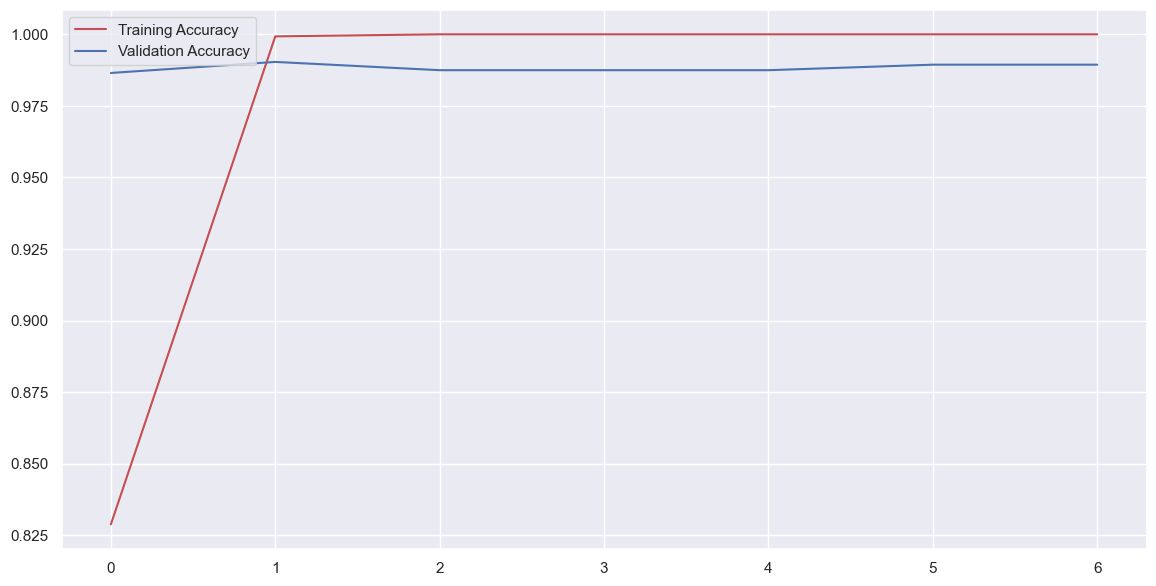

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

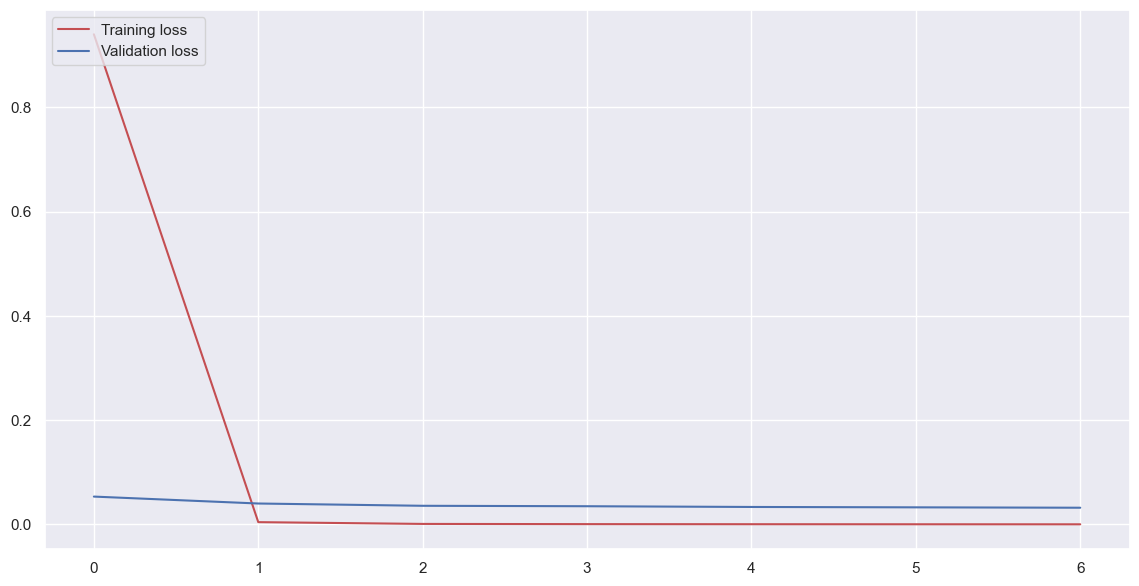

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [29]:
hist_=pd.DataFrame(history.history)
hist_

,accuracy,auc,loss,precision,recall,val_accuracy,val_auc,val_loss,val_precision,val_recall,learning_rate
0,0.828833,0.962175,0.940037,0.884252,0.812199,0.986499,0.998996,0.053523,0.989331,0.983607,0.00001
1,0.999277,1.000000,0.004502,0.999518,0.999036,0.990357,0.999498,0.040235,0.990329,0.987464,0.00001
2,1.000000,1.000000,0.001104,1.000000,1.000000,0.987464,0.999502,0.035870,0.987440,0.985535,0.00001
3,1.000000,1.000000,0.000710,1.000000,1.000000,0.987464,0.999503,0.035029,0.987440,0.985535,0.00001
4,1.000000,1.000000,0.000545,1.000000,1.000000,0.987464,0.999504,0.033613,0.988395,0.985535,0.00001
5,1.000000,1.000000,0.000439,1.000000,1.000000,0.989392,0.999505,0.032898,0.989362,0.986499,0.00001
6,1.000000,1.000000,0.000364,1.000000,1.000000,0.989392,0.999505,0.032164,0.989362,0.986499,0.00001


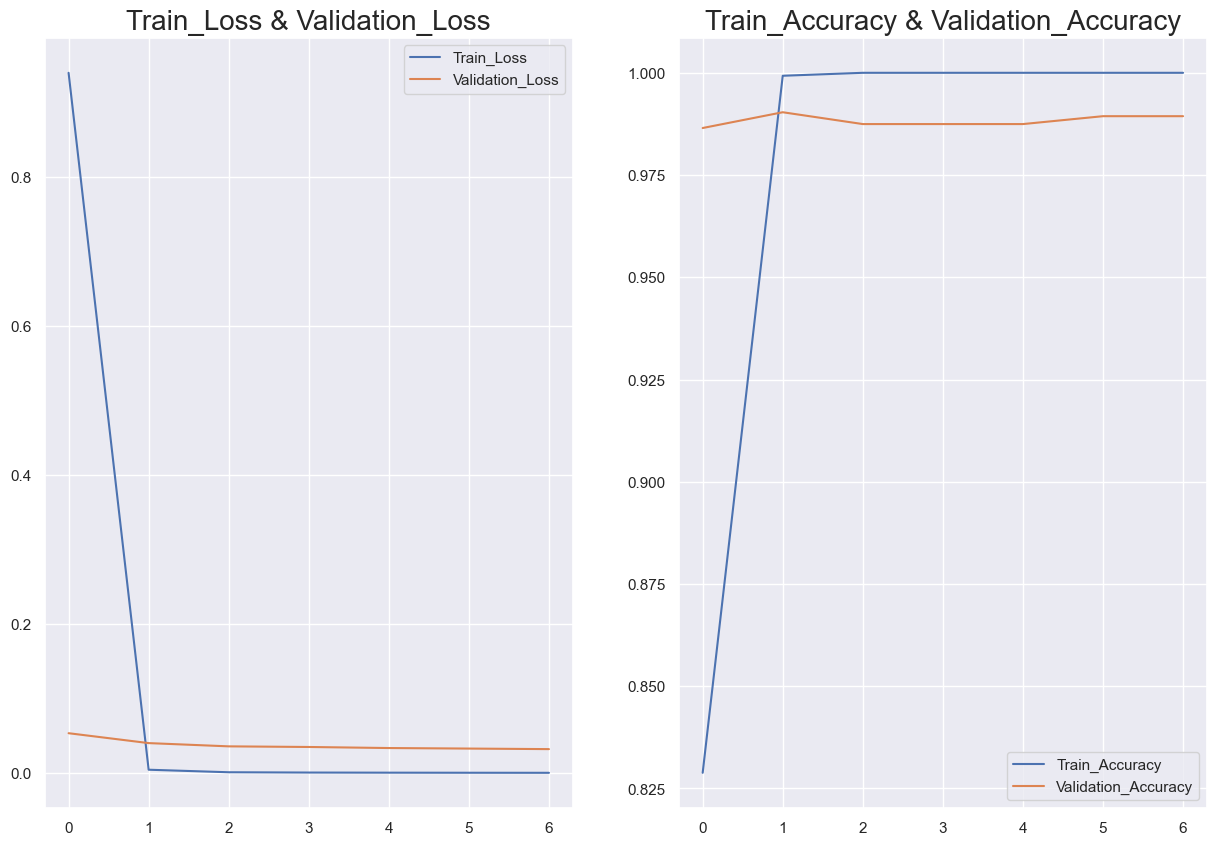

In [30]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.show()

In [31]:
predic = model.predict(X_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step


In [3]:
y_pred = np.argmax(predic, axis=1)
y_pred = np.ravel(y_pred)
print(y_pred)
print(len(y_pred))

NameError: name 'np' is not defined

In [33]:
y_test2 = np.argmax(y_test1, axis=1)
y_test2 = np.ravel(y_test2)

array([[39,  0,  0, ...,  0,  0, 37],
       [ 0, 33,  0, ...,  0,  0,  0],
       [ 0,  0, 37, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 47,  0,  0],
       [ 0,  0,  0, ...,  0, 45,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

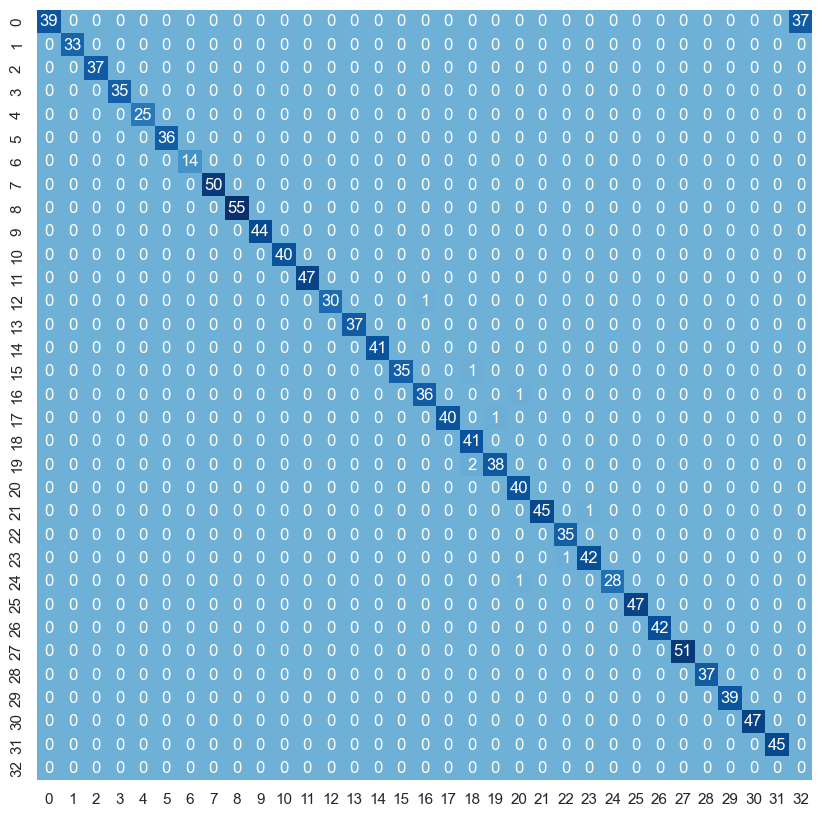

In [35]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))
CM = confusion_matrix(y_test2,y_pred)
sns.heatmap(CM,fmt='g',center = True,cbar=False,annot=True,cmap='Blues')
CM

In [36]:
from sklearn.metrics import classification_report
ClassificationReport = classification_report(y_test2,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       1.00      0.51      0.68        76
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        50
           8       1.00      1.00      1.00        55
           9       1.00      1.00      1.00        44
          10       1.00      1.00      1.00        40
          11       1.00      1.00      1.00        47
          12       1.00      0.97      0.98        31
          13       1.00      1.00      1.00        37
          14       1.00      1.00      1.00        41
          15       1.00      0.97      0.99        36
          16       0.97      0.97      0.97        37

C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


END


In [37]:
import cv2 

key = cv2. waitKey(1)
webcam = cv2.VideoCapture(0)
while True:
    try:
        check, frame = webcam.read()
        print(check) #prints true as long as the webcam is running
        print(frame) #prints matrix values of each framecd 
        cv2.imshow("Capturing", frame)
        key = cv2.waitKey(1)
        if key == ord('q'): 
            cv2.imwrite(filename='saved_img.jpg', img=frame)
            webcam.release()
            img_new = cv2.imread('saved_img.jpg', cv2.IMREAD_GRAYSCALE)
            img_new = cv2.imshow("Captured Image", img_new)
            cv2.waitKey(1650)
            cv2.destroyAllWindows()
            break

        
    except(KeyboardInterrupt):
        print("Turning off camera.")
        webcam.release()
        print("Camera off.")
        print("Program ended.")
        cv2.destroyAllWindows()
        break

True
[[[125  88 135]
  [125  90 136]
  [124  93 138]
  ...
  [217 209 210]
  [215 208 209]
  [214 207 208]]

 [[123  87 133]
  [124  90 135]
  [124  92 136]
  ...
  [218 208 210]
  [216 207 208]
  [216 207 208]]

 [[121  87 131]
  [123  89 133]
  [123  92 134]
  ...
  [220 207 209]
  [218 205 207]
  [218 205 207]]

 ...

 [[146 124 142]
  [146 124 142]
  [146 124 142]
  ...
  [221 178 183]
  [221 178 183]
  [221 178 183]]

 [[147 125 143]
  [146 124 142]
  [146 125 141]
  ...
  [222 177 183]
  [224 177 183]
  [224 177 183]]

 [[147 125 143]
  [146 124 142]
  [146 125 141]
  ...
  [223 177 183]
  [225 177 183]
  [225 176 182]]]
True
[[[ 87  89 104]
  [ 89  89 105]
  [ 91  89 107]
  ...
  [209 189 185]
  [207 188 184]
  [206 189 183]]

 [[ 85  85 101]
  [ 87  87 104]
  [ 88  87 104]
  ...
  [208 188 184]
  [208 188 184]
  [206 187 182]]

 [[ 82  82  99]
  [ 84  84 101]
  [ 87  86 103]
  ...
  [209 188 184]
  [208 187 183]
  [207 186 181]]

 ...

 [[119 113 121]
  [120 114 122]
  [119 114

In [105]:
class_labels = '0123456789abcdefghijklmnopqrstuvwxyz'

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224,224))  
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  
    return img_array

def classify_image(image_path):
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]  
    return predicted_label
image_path = 'saved_img.jpg'  
predicted_label = classify_image(image_path)
print(f'The predicted label for the input image is: {predicted_label}')
img = load_img(image_path)
plt.imshow(img)
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


IndexError: string index out of range

In [97]:
import pyttsx3
engine = pyttsx3.init()
#used to set speed
engine.setProperty("rate", 100)  
engine.say(predicted_label)  
engine.runAndWait()

In [118]:
### Load saved model 
model2 = load_model("asl.h5")
model2.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 139,717,734 (532.98 MB)

 Trainable params: 119,693,348 (456.59 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 2 (12.00 B)

In [38]:
import cv2 

key = cv2. waitKey(1)
webcam = cv2.VideoCapture(0)
while True:
    try:
        check, frame = webcam.read()
        # print(check) #prints true as long as the webcam is running
        # print(frame) #prints matrix values of each framecd 
        cv2.imshow("Capturing", frame)
        key = cv2.waitKey(1)
        if key == ord('q'): 
            cv2.imwrite(filename='saved_img.jpg', img=frame)
            webcam.release()
            img_new = cv2.imread('saved_img.jpg', cv2.IMREAD_GRAYSCALE)
            img_new = cv2.imshow("Captured Image", img_new)
            cv2.waitKey(1650)
            cv2.destroyAllWindows()
            break

        
    except(KeyboardInterrupt):
        print("Turning off camera.")
        webcam.release()
        print("Camera off.")
        print("Program ended.")
        cv2.destroyAllWindows()
        break

Turning off camera.
Camera off.
Program ended.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
The predicted label for the input image is: z


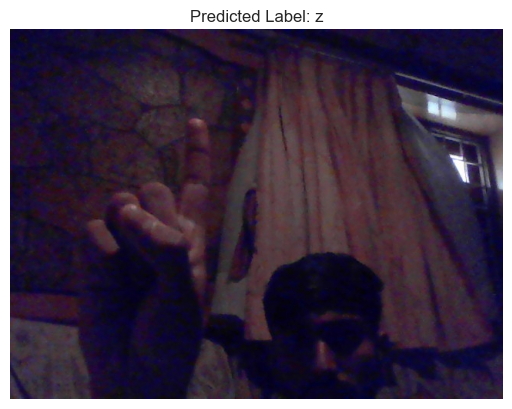

In [120]:
model2 = load_model("asl.h5")
class_labels = '0123456789abcdefghijklmnopqrstuvwxyz'

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224,224))  
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  
    return img_array

def classify_image(image_path):
    img_array = preprocess_image(image_path)
    prediction = model2.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]  
    return predicted_label
image_path = 'saved_img.jpg'  
predicted_label = classify_image(image_path)
print(f'The predicted label for the input image is: {predicted_label}')
img = load_img(image_path)
plt.imshow(img)
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()



In [121]:
import pyttsx3
engine = pyttsx3.init()
#used to set speed
engine.setProperty("rate", 100)  
engine.say(predicted_label)  
engine.runAndWait()

In [ ]:
# for speech to img

In [6]:
import speech_recognition as sr

def speech_to_text():
    # Create a recognizer object
    recognizer = sr.Recognizer()

    # Use the default microphone as the audio source
    with sr.Microphone() as source:
        print("Listening... Speak now!")
        
        # Adjust for ambient noise and listen for audio
        recognizer.adjust_for_ambient_noise(source)
        audio = recognizer.listen(source)

    try:
        # Use Google Speech Recognition to convert audio to text
        text = recognizer.recognize_google(audio)
        print("You said: " + text)
        return text
    except sr.UnknownValueError:
        print("Sorry, I couldn't understand the audio.")
    except sr.RequestError as e:
        print("Could not request results from the speech recognition service; {0}".format(e))

# Call the function
speech_to_text()

Listening... Speak now!
Sorry, I couldn't understand the audio.


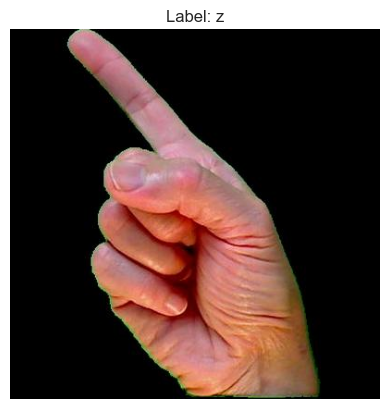

In [122]:
text = 'z'
folderPath = os.path.join("asl_dataset",text)
for j in os.listdir(folderPath):
    img_path = os.path.join(folderPath,j)
    img = load_img(img_path)
    plt.imshow(img)

    plt.title(f'Label: {text}')
    plt.axis('off')
    plt.show()
    break